In [1]:
import torch
from torchvision import transforms

In [2]:
import cv2
img_path = '/content/dog.jpg'

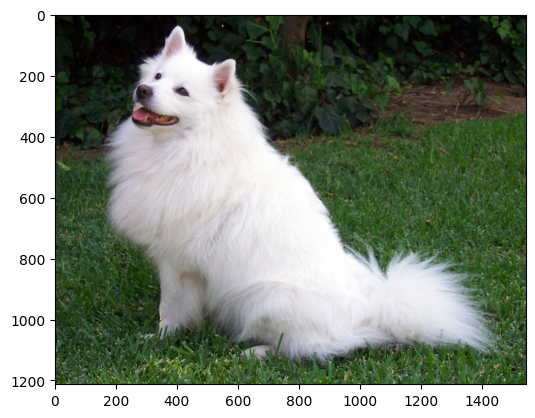

In [3]:
import matplotlib.pyplot as plt
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
print (img.max(), img.min())

255 0


Text(0.5, 1.0, 'distribution of pixels')

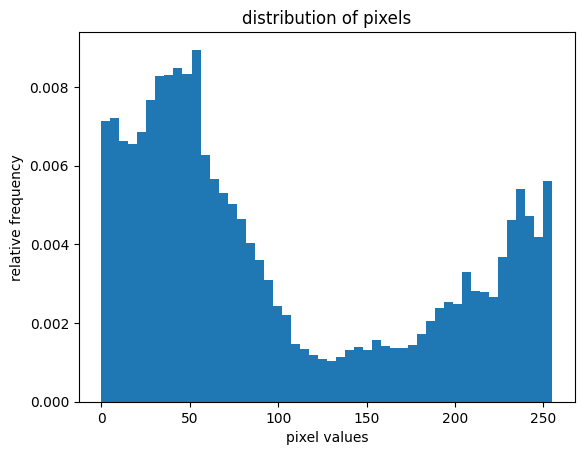

In [5]:
plt.hist(img.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [6]:
transform = transforms.Compose([
    transforms.ToTensor()
])


Text(0.5, 1.0, 'distribution of pixels')

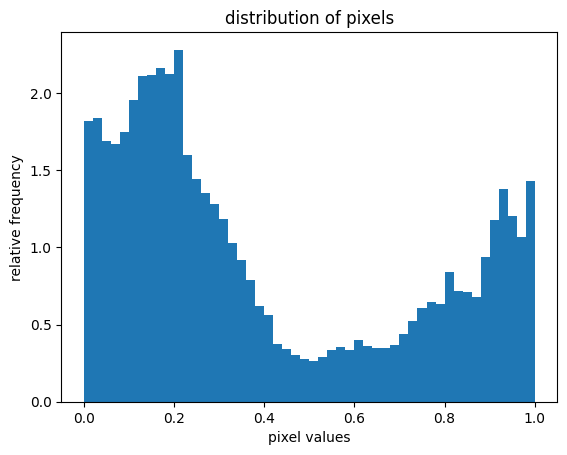

In [7]:
import numpy as np

img_tr = transform(img)

# Convert tensor image to numpy array
img_np = np.array(img_tr)

# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [8]:
img_tr = transform(img)

# calculate mean and std
mean= img_tr.mean([1,2])
std = img_tr.std([1,2])

# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.3885, 0.4313, 0.3678])
Std of the image: tensor([0.3230, 0.2976, 0.3393])


Text(0.5, 1.0, 'distribution of pixels')

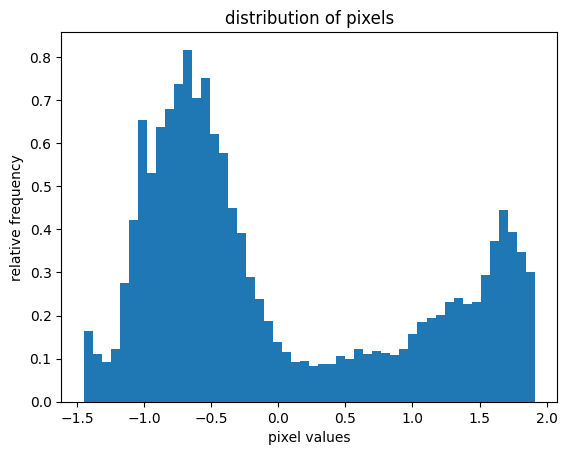

In [9]:
transform_norm = transforms.Compose([
    transforms.Normalize(mean, std)
])

img_tr_norm = transform_norm(img_tr)


img_tr_norm_np = np.array(img_tr_norm)

# plot the pixel values
plt.hist(img_tr_norm_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Text(0.5, 1.0, 'Normalize with Mean and Std')

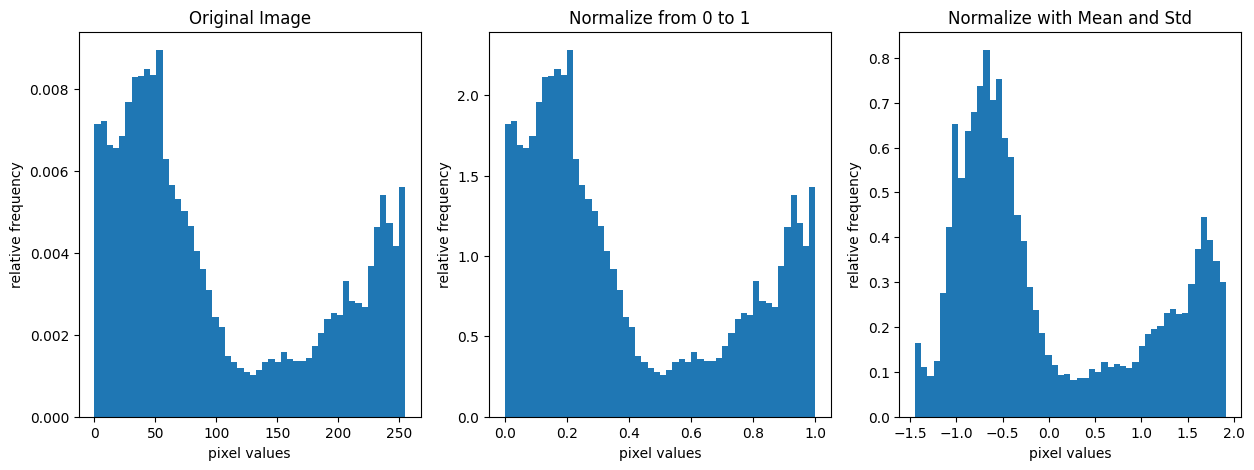

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(img.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("Normalize from 0 to 1")

plt.subplot(1,3,3)
plt.hist(img_tr_norm_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("Normalize with Mean and Std")

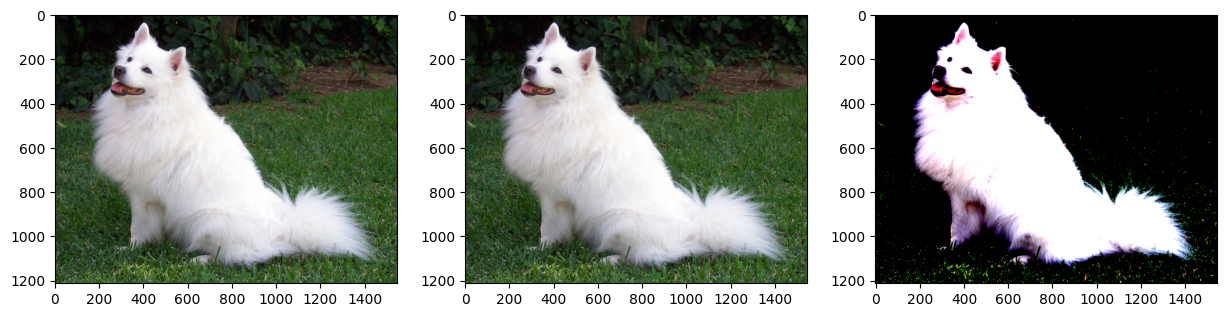

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(np.array(img_np).transpose(1, 2, 0))

plt.subplot(1,3,3)
plt.imshow(np.array(img_tr_norm_np).transpose(1, 2, 0))


In [12]:
img.shape

(1213, 1546, 3)

In [13]:
print (img.max(), img_np.max(), img_tr_norm_np.max())
print (img.min(), img_np.min(), img_tr_norm_np.min() )


255 1.0 1.9112053
0 0.0 -1.4494519


In [14]:
print (img.shape, img_np.shape, img_tr_norm_np.shape)

(1213, 1546, 3) (3, 1213, 1546) (3, 1213, 1546)
